In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Cargar los Datos

In [3]:
# Cargar los datos
df = pd.read_csv('data.csv')
print(df.describe())

       Rented Bike Count         Hour  Temperature(C)  Humidity(%)  \
count        8760.000000  8760.000000     8760.000000  8760.000000   
mean          704.602055    11.500000       12.882922    58.226256   
std           644.997468     6.922582       11.944825    20.362413   
min             0.000000     0.000000      -17.800000     0.000000   
25%           191.000000     5.750000        3.500000    42.000000   
50%           504.500000    11.500000       13.700000    57.000000   
75%          1065.250000    17.250000       22.500000    74.000000   
max          3556.000000    23.000000       39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(C)  \
count       8760.000000       8760.000000               8760.000000   
mean           1.724909       1436.825799                  4.073813   
std            1.036300        608.298712                 13.060369   
min            0.000000         27.000000                -30.600000   
25%           

Histogramas

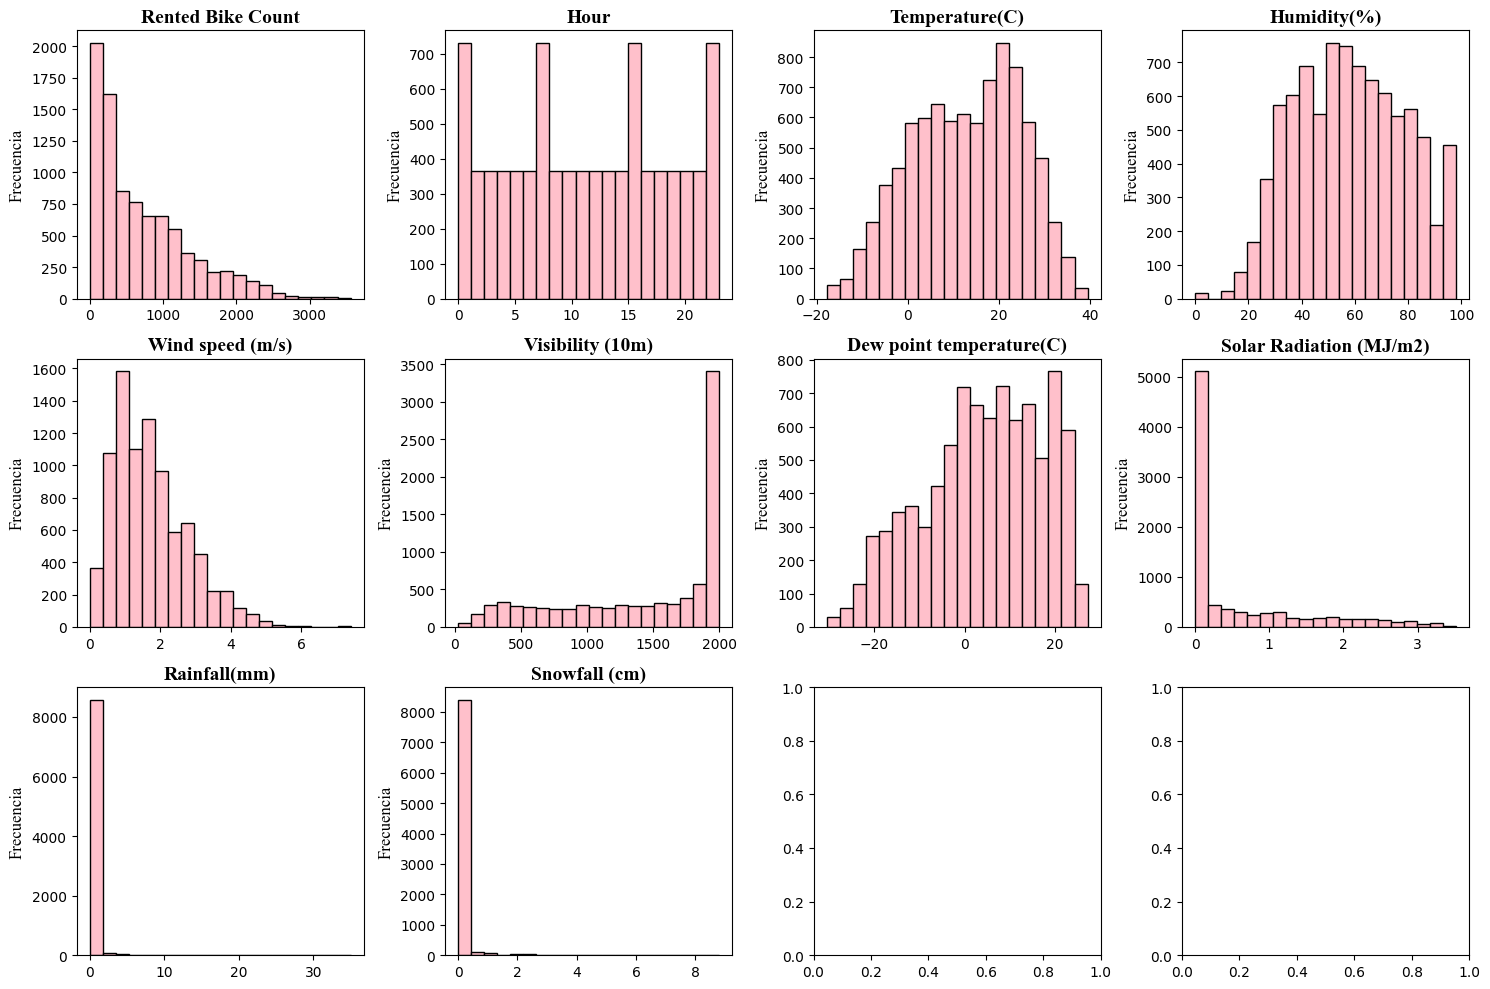

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

colors = sns.color_palette(['#FFC0CB'] * len(df.select_dtypes(include=['float64', 'int64']).columns))  
titles = df.select_dtypes(include=['float64', 'int64']).columns

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
axs = axs.flatten()

for ax, column, color in zip(axs, titles, colors):
    df[column].plot(kind='hist', ax=ax, bins=20, color=color, edgecolor='black')
    ax.set_title(column, fontsize=14, fontweight='bold', family='Times New Roman')
    ax.set_xlabel('')
    ax.set_ylabel('Frecuencia', fontsize=12, family='Times New Roman')
    ax.grid(False)

plt.tight_layout()
plt.show()


Diagramas de Caja

C:\Users\Carol\AppData\Local\Temp\ipykernel_23168\3089275807.py:8: UserWarning: 
The palette list has fewer values (4) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']), palette=rosados_pastel)


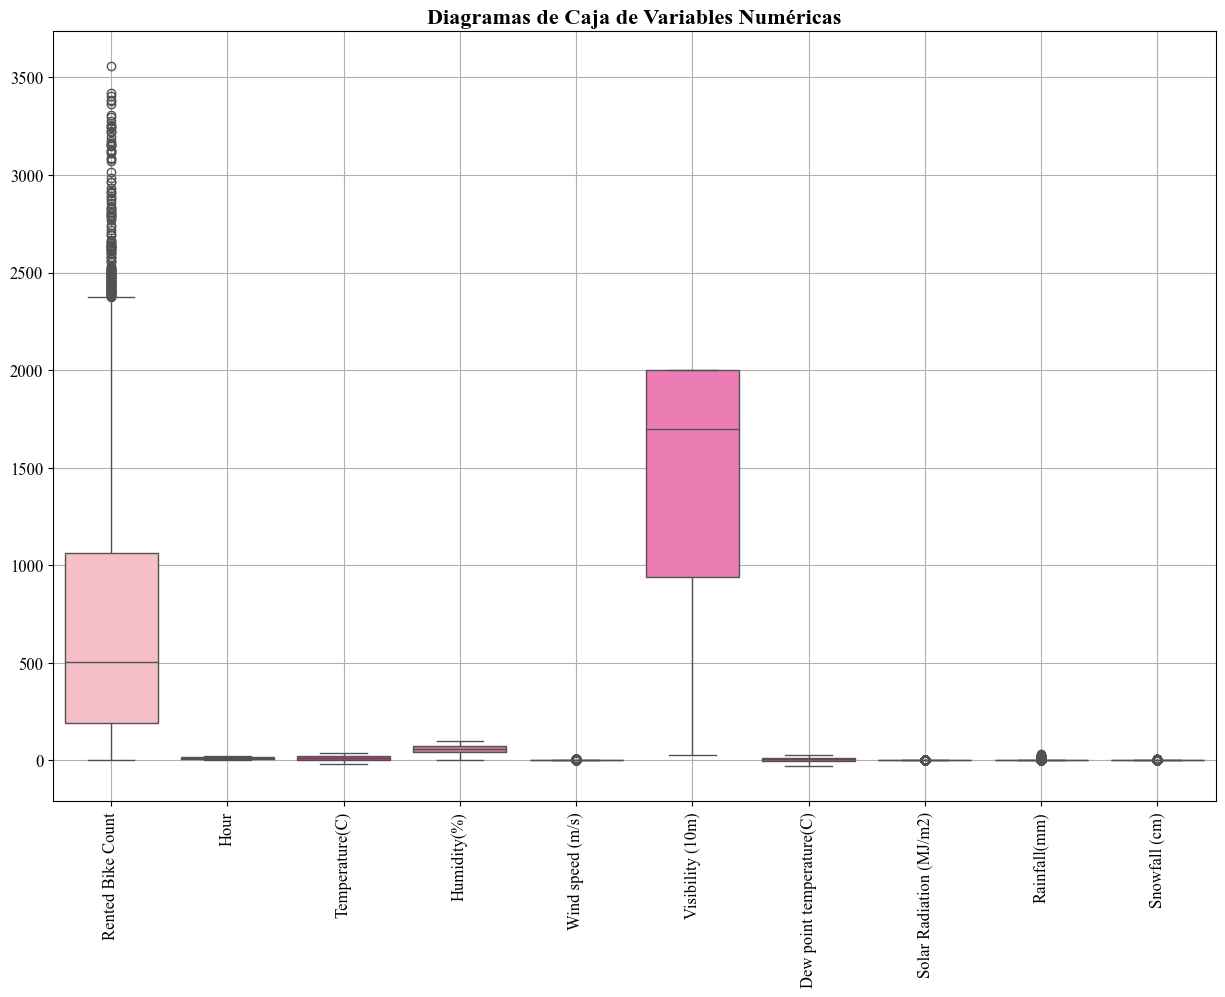

Estadísticas de los Diagramas de Caja:
                           Min  1st Quartile (25%)  Median (50%)  \
Rented Bike Count          0.0              191.00        504.50   
Hour                       0.0                5.75         11.50   
Temperature(C)           -17.8                3.50         13.70   
Humidity(%)                0.0               42.00         57.00   
Wind speed (m/s)           0.0                0.90          1.50   
Visibility (10m)          27.0              940.00       1698.00   
Dew point temperature(C) -30.6               -4.70          5.10   
Solar Radiation (MJ/m2)    0.0                0.00          0.01   
Rainfall(mm)               0.0                0.00          0.00   
Snowfall (cm)              0.0                0.00          0.00   

                          3rd Quartile (75%)      Max  
Rented Bike Count                    1065.25  3556.00  
Hour                                   17.25    23.00  
Temperature(C)                         22.50

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

rosados_pastel = [ '#FFB6C1', '#FF69B4', '#FF1493', '#DB7093']

plt.figure(figsize=(15, 10))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']), palette=rosados_pastel)
plt.xticks(rotation=90, fontsize=12, family='Times New Roman')
plt.yticks(fontsize=12, family='Times New Roman')
plt.title('Diagramas de Caja de Variables Numéricas', fontsize=16, fontweight='bold', family='Times New Roman')
plt.grid(True)
plt.show()

def boxplot_statistics(df):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    stats_dict = {}
    
    for column in numeric_columns:
        stats = df[column].describe(percentiles=[.25, .5, .75])
        stats_dict[column] = {
            'Min': stats['min'],
            '1st Quartile (25%)': stats['25%'],
            'Median (50%)': stats['50%'],
            '3rd Quartile (75%)': stats['75%'],
            'Max': stats['max']
        }
    
    stats_df = pd.DataFrame(stats_dict).T
    print("Estadísticas de los Diagramas de Caja:")
    print(stats_df)

    

boxplot_statistics(df)


C:\Users\Carol\AppData\Local\Temp\ipykernel_23168\1238756938.py:10: UserWarning: 
The palette list has fewer values (5) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=numeric_columns, palette=rosados_pastel)


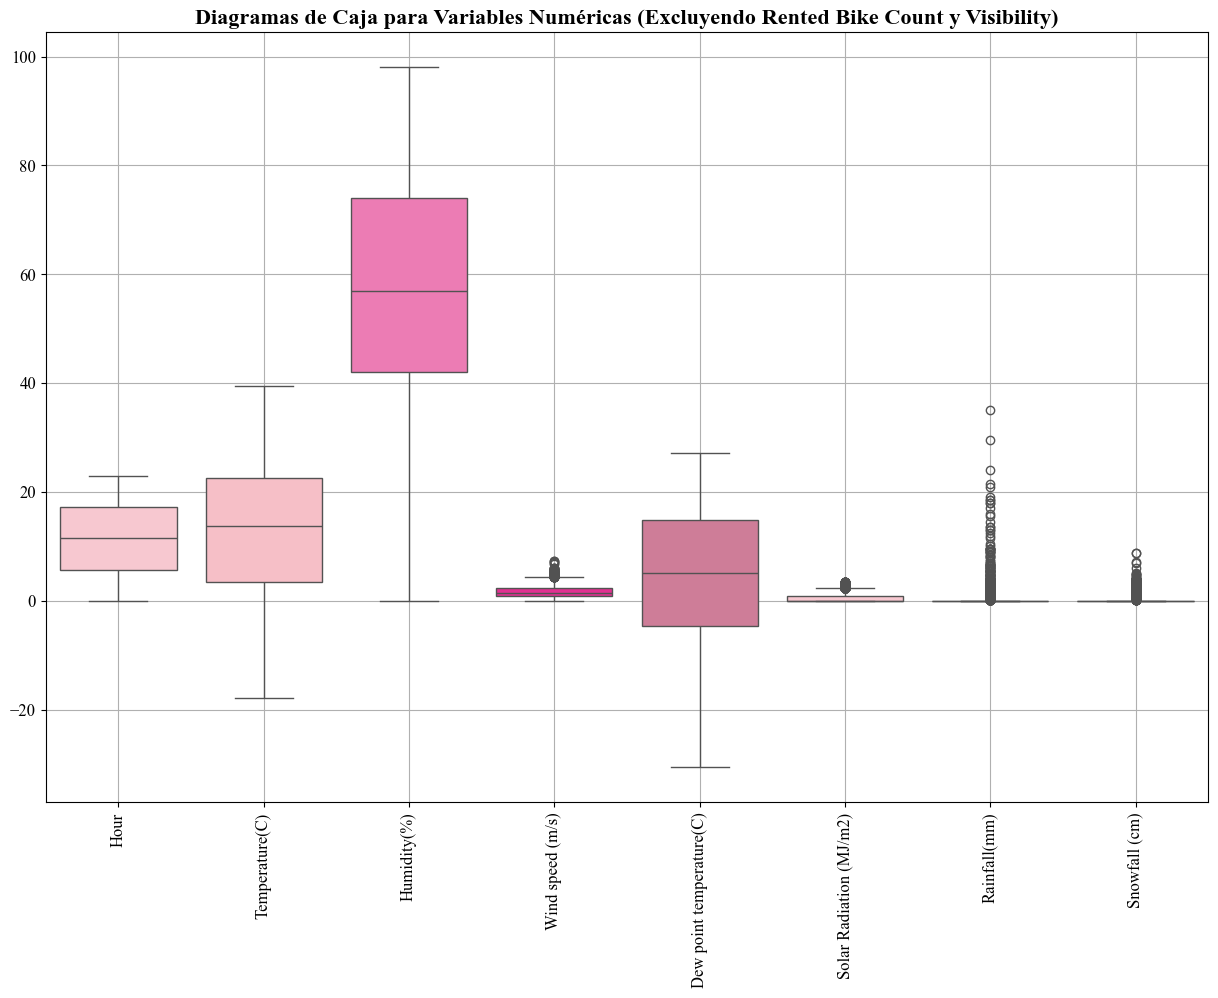

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Rented Bike Count', 'Visibility (10m)'])

rosados_pastel = ['#FFC0CB', '#FFB6C1', '#FF69B4', '#FF1493', '#DB7093']


plt.figure(figsize=(15, 10))
sns.boxplot(data=numeric_columns, palette=rosados_pastel)
plt.xticks(rotation=90, fontsize=12, family='Times New Roman')
plt.yticks(fontsize=12, family='Times New Roman')
plt.title('Diagramas de Caja para Variables Numéricas (Excluyendo Rented Bike Count y Visibility)', fontsize=16, fontweight='bold', family='Times New Roman')
plt.grid(True)
plt.show()


Diagramas de Violín

Estadísticas del Diagrama de Violín para 'Rented Bike Count' por 'Seasons':
          count         mean         std  min     25%    50%      75%     max
Seasons                                                                      
Autumn   2184.0   819.597985  651.085621  0.0  241.75  763.5  1197.50  3298.0
Spring   2208.0   730.031250  621.509635  0.0  206.00  583.0  1105.25  3251.0
Summer   2208.0  1034.073370  690.244759  9.0  526.75  905.5  1442.50  3556.0
Winter   2160.0   225.541204  150.372236  3.0  110.00  203.0   305.00   937.0


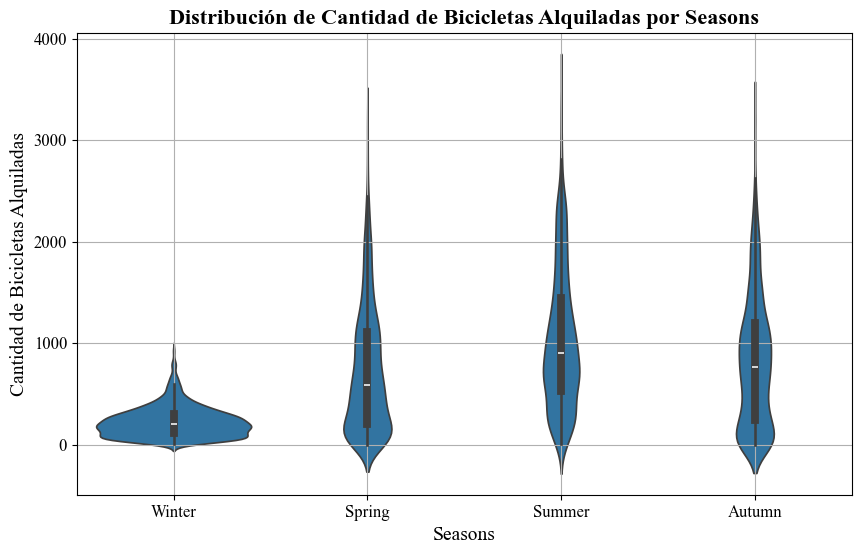

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def violinplot_statistics(df, column, category):
    stats = df.groupby(category)[column].describe(percentiles=[.25, .5, .75])
    
    print(f"Estadísticas del Diagrama de Violín para '{column}' por '{category}':")
    print(stats)
    
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=category, y=column, data=df)
    plt.title(f'Distribución de Cantidad de Bicicletas Alquiladas por {category}', fontsize=16, fontweight='bold', family='Times New Roman')
    plt.xlabel(category, fontsize=14, family='Times New Roman')
    plt.ylabel('Cantidad de Bicicletas Alquiladas', fontsize=14, family='Times New Roman')
    plt.xticks(fontsize=12, family='Times New Roman')
    plt.yticks(fontsize=12, family='Times New Roman')
    plt.grid(True)
    plt.show()

violinplot_statistics(df, 'Rented Bike Count', 'Seasons')


In [8]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

corr = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="RdPu", cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de la Correlación')
plt.show()


SyntaxError: keyword argument repeated: cmap (2378218772.py, line 6)

<Figure size 1000x800 with 0 Axes>

Gráfico de Series Temporales de Ingresos

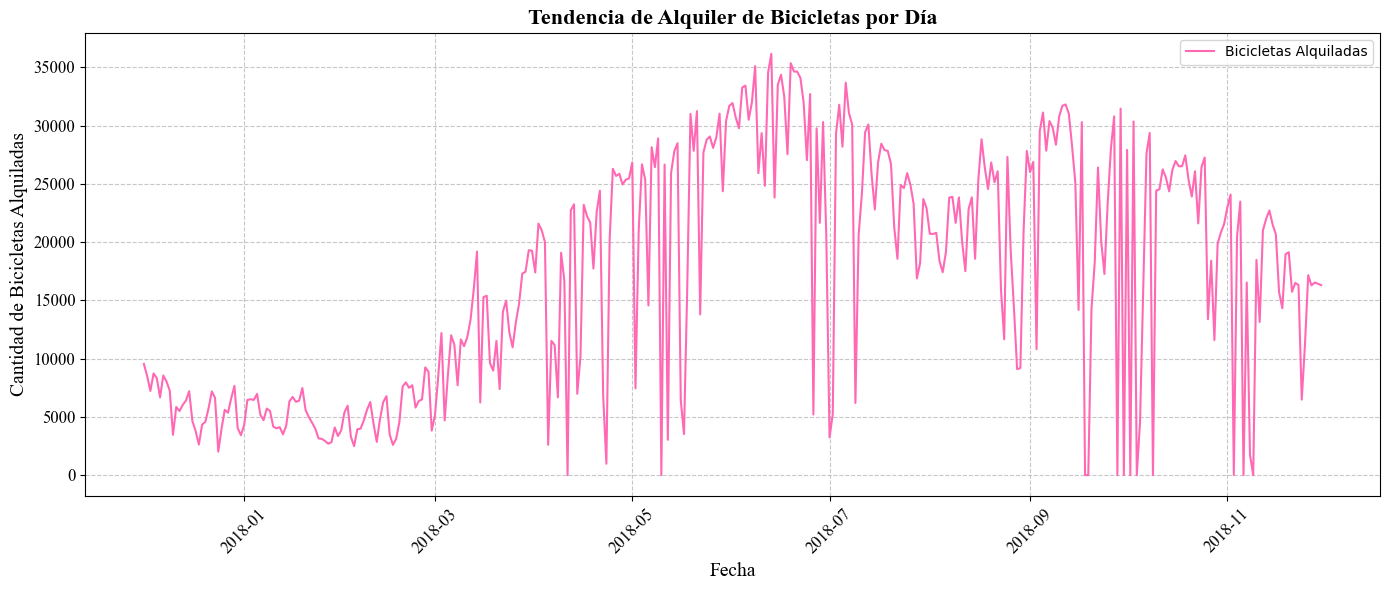

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

daily_rented = df.groupby('Date')['Rented Bike Count'].sum()

plt.figure(figsize=(14, 6))
plt.plot(daily_rented.index, daily_rented.values, label='Bicicletas Alquiladas', color='#FF69B4')  # Rosa pastel
plt.title('Tendencia de Alquiler de Bicicletas por Día', fontsize=16, fontweight='bold', family='Times New Roman')
plt.xlabel('Fecha', fontsize=14, family='Times New Roman')
plt.ylabel('Cantidad de Bicicletas Alquiladas', fontsize=14, family='Times New Roman')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(fontsize=12, family='Times New Roman', rotation=45)
plt.yticks(fontsize=12, family='Times New Roman')
plt.tight_layout()  
plt.show()


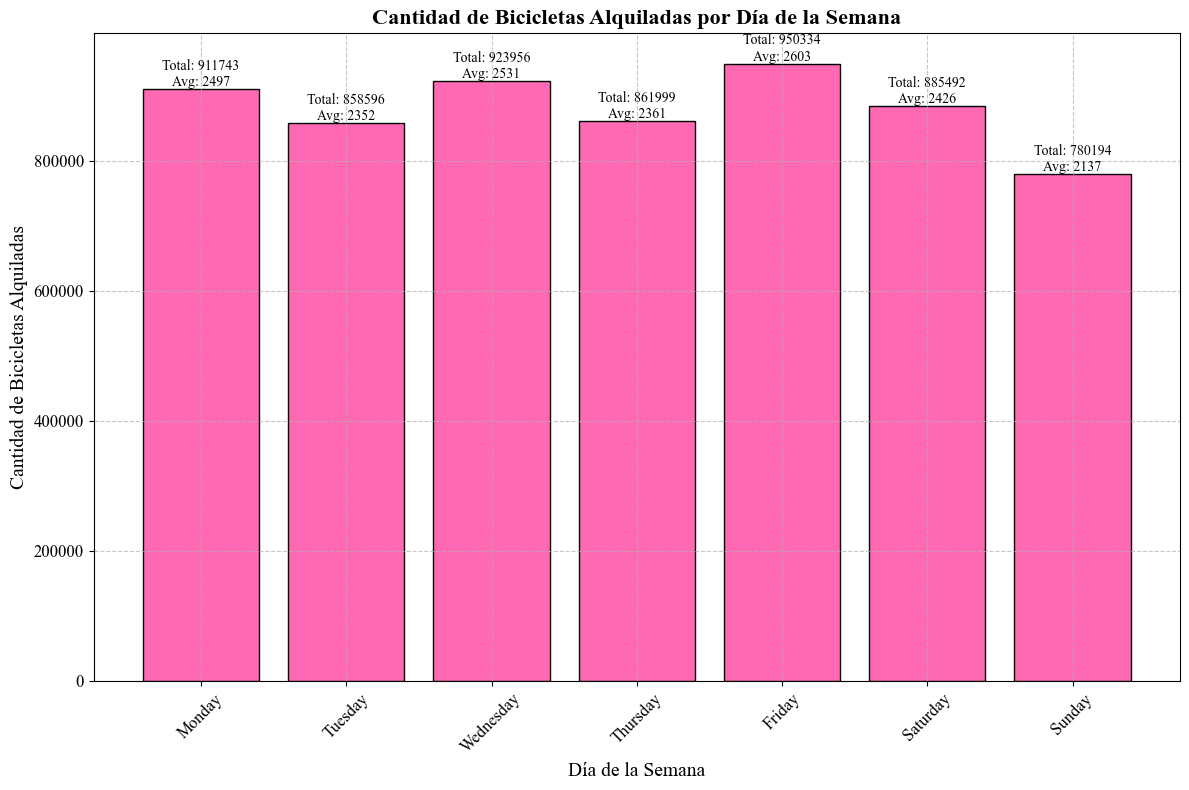

C:\Users\Carol\AppData\Local\Temp\ipykernel_18816\1329471777.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Day of Week', y='Rented Bike Count', data=df, palette=['#FFB6C1', '#FF69B4', '#FF1493', '#FFC0CB', '#FF69B4', '#FF1493', '#FFC0CB'])


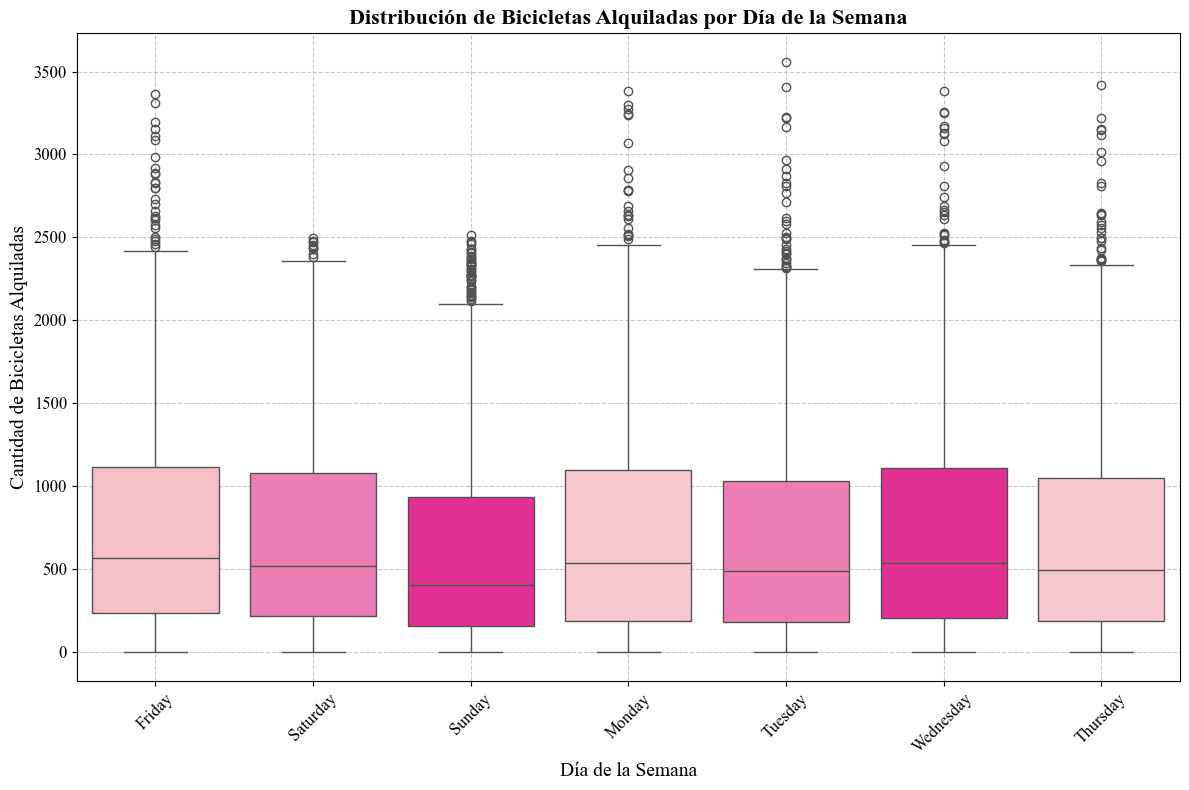

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Day of Week'] = df['Date'].dt.day_name()

weekly_rented = df.groupby('Day of Week')['Rented Bike Count'].sum()

total_days = df['Date'].dt.date.nunique()
average_daily_rented = weekly_rented / total_days

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_rented = weekly_rented.reindex(ordered_days)
average_daily_rented = average_daily_rented.reindex(ordered_days)

plt.figure(figsize=(12, 8))
bars = plt.bar(weekly_rented.index, weekly_rented.values, color='#FF69B4', edgecolor='black')

for bar, total, avg in zip(bars, weekly_rented.values, average_daily_rented.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height + 10, f'Total: {int(total)}\nAvg: {int(avg)}', 
             ha='center', va='bottom', fontsize=10, family='Times New Roman')

plt.title('Cantidad de Bicicletas Alquiladas por Día de la Semana', fontsize=16, fontweight='bold', family='Times New Roman')
plt.xlabel('Día de la Semana', fontsize=14, family='Times New Roman')
plt.ylabel('Cantidad de Bicicletas Alquiladas', fontsize=14, family='Times New Roman')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12, family='Times New Roman', rotation=45)
plt.yticks(fontsize=12, family='Times New Roman')
plt.tight_layout()
plt.show()




df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Day of Week'] = df['Date'].dt.day_name()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Day of Week', y='Rented Bike Count', data=df, palette=['#FFB6C1', '#FF69B4', '#FF1493', '#FFC0CB', '#FF69B4', '#FF1493', '#FFC0CB'])

plt.title('Distribución de Bicicletas Alquiladas por Día de la Semana', fontsize=16, fontweight='bold', family='Times New Roman')
plt.xlabel('Día de la Semana', fontsize=14, family='Times New Roman')
plt.ylabel('Cantidad de Bicicletas Alquiladas', fontsize=14, family='Times New Roman')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12, family='Times New Roman', rotation=45)
plt.yticks(fontsize=12, family='Times New Roman')
plt.tight_layout()
plt.show()


C:\Users\Carol\AppData\Local\Temp\ipykernel_18816\2334135613.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_rented = df.resample('M', on='Date')['Rented Bike Count'].mean()


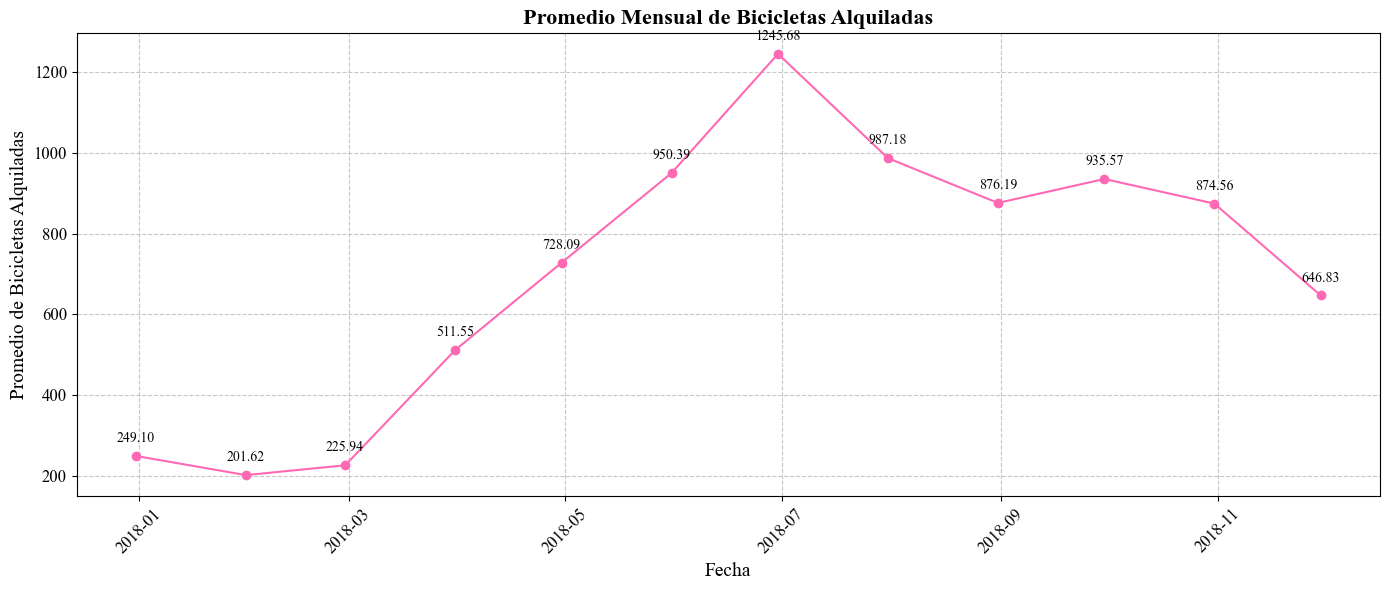

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
monthly_rented = df.resample('M', on='Date')['Rented Bike Count'].mean()

plt.figure(figsize=(14, 6))
plt.plot(monthly_rented.index, monthly_rented.values, marker='o', linestyle='-', color='#FF69B4')

for date, value in monthly_rented.items():
    plt.annotate(f'{value:.2f}', (date, value), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, family='Times New Roman')

plt.title('Promedio Mensual de Bicicletas Alquiladas', fontsize=16, fontweight='bold', family='Times New Roman')
plt.xlabel('Fecha', fontsize=14, family='Times New Roman')
plt.ylabel('Promedio de Bicicletas Alquiladas', fontsize=14, family='Times New Roman')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12, family='Times New Roman', rotation=45)
plt.yticks(fontsize=12, family='Times New Roman')
plt.tight_layout()
plt.show()


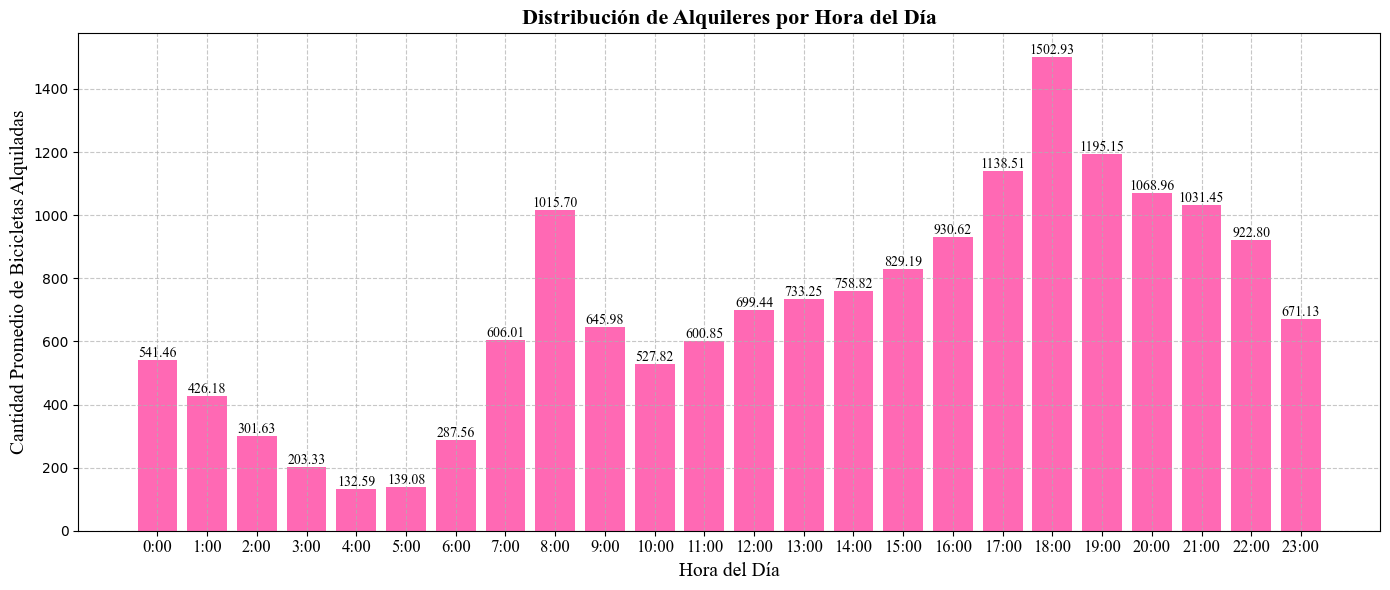

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
hourly_rented = df.groupby('Hour')['Rented Bike Count'].mean()

plt.figure(figsize=(14, 6))
bars = plt.bar(hourly_rented.index, hourly_rented.values, color='#FF69B4')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=10, family='Times New Roman')

plt.xticks(ticks=hourly_rented.index, labels=[f'{int(hour)}:00' for hour in hourly_rented.index], fontsize=12, family='Times New Roman')

plt.title('Distribución de Alquileres por Hora del Día', fontsize=16, fontweight='bold', family='Times New Roman')
plt.xlabel('Hora del Día', fontsize=14, family='Times New Roman')
plt.ylabel('Cantidad Promedio de Bicicletas Alquiladas', fontsize=14, family='Times New Roman')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\Carol\AppData\Local\Temp\ipykernel_18816\4187681204.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=seasonal_rented.index, y=seasonal_rented.values, palette=['#FFB6C1', '#FF69B4', '#FF1493', '#FFC0CB'])  # Tonalidades rosadas pastel


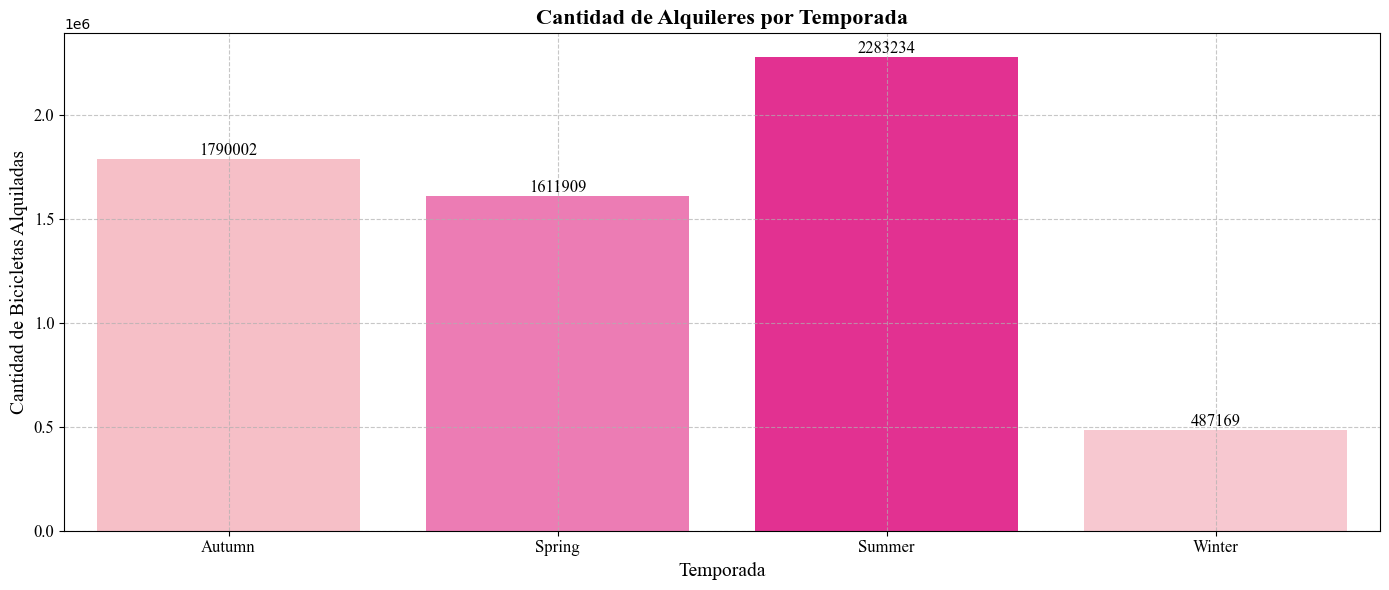

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

seasonal_rented = df.groupby('Seasons')['Rented Bike Count'].sum()

plt.figure(figsize=(14, 6))
bars = sns.barplot(x=seasonal_rented.index, y=seasonal_rented.values, palette=['#FFB6C1', '#FF69B4', '#FF1493', '#FFC0CB'])  # Tonalidades rosadas pastel

for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}', 
             ha='center', va='bottom', fontsize=12, family='Times New Roman')

plt.title('Cantidad de Alquileres por Temporada', fontsize=16, fontweight='bold', family='Times New Roman')
plt.xlabel('Temporada', fontsize=14, family='Times New Roman')
plt.ylabel('Cantidad de Bicicletas Alquiladas', fontsize=14, family='Times New Roman')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12, family='Times New Roman')
plt.yticks(fontsize=12, family='Times New Roman')
plt.tight_layout()  
plt.show()


C:\Users\Carol\AppData\Local\Temp\ipykernel_18816\2236577011.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=holiday_rented.index, y=holiday_rented.values, palette=['#FFB6C1', '#FF69B4'])


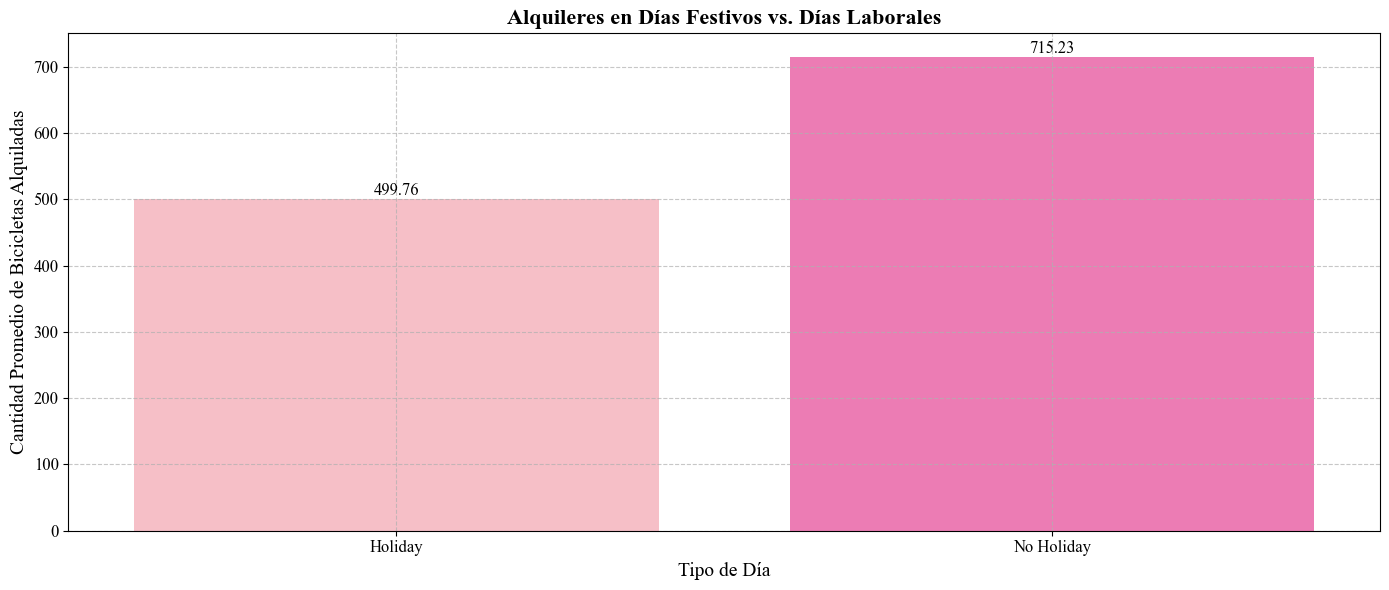

Promedio de bicicletas alquiladas en días festivos: 499.76
Promedio de bicicletas alquiladas en días laborables: 715.23
Porcentaje de aumento en días laborables respecto a días festivos: 43.12%


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

holiday_rented = df.groupby('Holiday')['Rented Bike Count'].mean()

plt.figure(figsize=(14, 6))
sns.barplot(x=holiday_rented.index, y=holiday_rented.values, palette=['#FFB6C1', '#FF69B4'])
plt.title('Alquileres en Días Festivos vs. Días Laborales', fontsize=16, fontweight='bold', family='Times New Roman')
plt.xlabel('Tipo de Día', fontsize=14, family='Times New Roman')
plt.ylabel('Cantidad Promedio de Bicicletas Alquiladas', fontsize=14, family='Times New Roman')
plt.grid(True, linestyle='--', alpha=0.7)

for index, value in enumerate(holiday_rented.values):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=12, family='Times New Roman')

plt.xticks(fontsize=12, family='Times New Roman')
plt.yticks(fontsize=12, family='Times New Roman')
plt.tight_layout()
plt.show()

mean_holiday = holiday_rented.get('Holiday', 0)
mean_no_holiday = holiday_rented.get('No Holiday', 0)

if mean_holiday > 0:
    percentage_increase = ((mean_no_holiday - mean_holiday) / mean_holiday) * 100
else:
    percentage_increase = float('inf')

print(f"Promedio de bicicletas alquiladas en días festivos: {mean_holiday:.2f}")
print(f"Promedio de bicicletas alquiladas en días laborables: {mean_no_holiday:.2f}")
print(f"Porcentaje de aumento en días laborables respecto a días festivos: {percentage_increase:.2f}%")


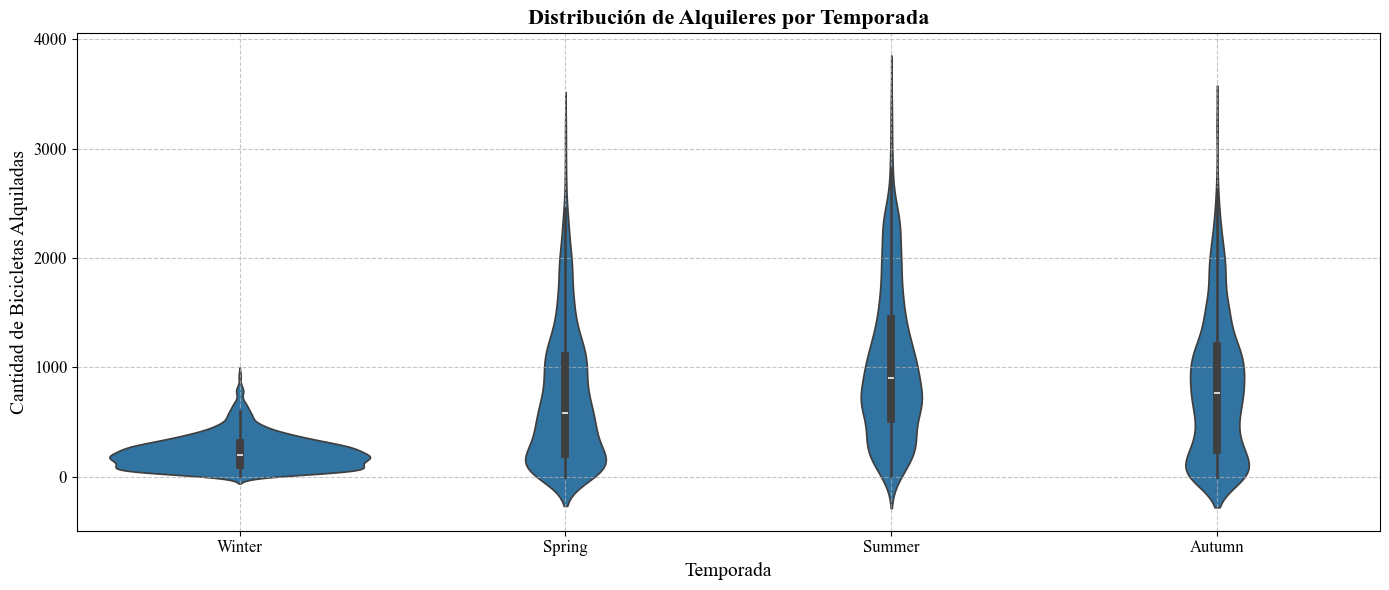

Estadísticas descriptivas de alquileres por temporada:
          count         mean         std  min     25%    50%      75%     max
Seasons                                                                      
Autumn   2184.0   819.597985  651.085621  0.0  241.75  763.5  1197.50  3298.0
Spring   2208.0   730.031250  621.509635  0.0  206.00  583.0  1105.25  3251.0
Summer   2208.0  1034.073370  690.244759  9.0  526.75  905.5  1442.50  3556.0
Winter   2160.0   225.541204  150.372236  3.0  110.00  203.0   305.00   937.0


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(14, 6))
sns.violinplot(x='Seasons', y='Rented Bike Count', data=df)
plt.title('Distribución de Alquileres por Temporada', fontsize=16, fontweight='bold', family='Times New Roman')
plt.xlabel('Temporada', fontsize=14, family='Times New Roman')
plt.ylabel('Cantidad de Bicicletas Alquiladas', fontsize=14, family='Times New Roman')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12, family='Times New Roman')
plt.yticks(fontsize=12, family='Times New Roman')
plt.tight_layout()
plt.show()

seasonal_stats = df.groupby('Seasons')['Rented Bike Count'].describe(percentiles=[.25, .5, .75])
print("Estadísticas descriptivas de alquileres por temporada:")
print(seasonal_stats)
